X.shape:(625, 6)
z.shape: (25, 25)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from common import *

def cross_val(k:int, model:str, lmb:int, X:np.ndarray, z:np.ndarray)-> np.ndarray:
    """Function for cross validating on k folds

    Args:
        k (int): Number of folds
        model (str): Linear regression model
        lmb (int): lambda value
        X (np.ndarray): Design matrix
        z (np.ndarray): target values

    Returns:
        np.ndarray: Mean score of MSE on all k folds
    """
    if model == "Ridge":  
        model = RidgeRegression(lambda_val = lmb)
    elif model == "Lasso":
        model = LassoRegression(lambda_val = lmb)
    elif model == "OLS":
        model = OLS()
    else: 
        "Provide a valid model as a string(Ridge/Lasso/OLS) "
    
    kfold = KFold(n_splits = k)
    scores_KFold = np.zeros(k)
    z = z.ravel()
    #scores_KFold idx counter         
    j = 0
    for train_inds, test_inds in kfold.split(X,z):
        
        #get all cols and selected train_inds rows:
        xtrain = X[train_inds,:]
        ytrain = z[train_inds]
        #get all cols and selected test_inds rows:
        xtest = X[test_inds,:]
        ytest = z[test_inds]
        model.fit(xtrain,ytrain)
        ypred = model.predict(xtest)
        scores_KFold[j] = np.sum((ypred - ytest)**2)/np.size(ypred)
        j += 1

    return np.mean(scores_KFold)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from common import *

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(4155)

def FrankeFunction(x: float ,y: float) -> float:
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x:np.ndarray, y:np.ndarray, n:int)->np.ndarray:
    if (len(x.shape)) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

# Generate the data.
n = 25
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)

degree = 2
X = create_X(x,y,degree)
t = FrankeFunction(x, y) + 0.3*np.random.normal(0, size = n)
# Decide degree on polynomial to fit

# Decide which values of lambda to use
nlambdas = 10
lambdas = np.logspace(-3, 5, nlambdas)


scores = np.zeros(nlambdas)
for lmb in range(nlambdas):
    score = cross_val(5,"ridge",lambdas[lmb],X,t)
    scores[lmb] = score
    print(score)
print(lambdas)
    

0.11384856091594542
0.11310855336474827
0.10802658314118788
0.0890570348073921
0.08272965737274927
0.1024161462696193
0.15738248995281823
0.19554095819585238
0.21784954892080682
0.22322977779146846
[1.00000000e-03 7.74263683e-03 5.99484250e-02 4.64158883e-01
 3.59381366e+00 2.78255940e+01 2.15443469e+02 1.66810054e+03
 1.29154967e+04 1.00000000e+05]


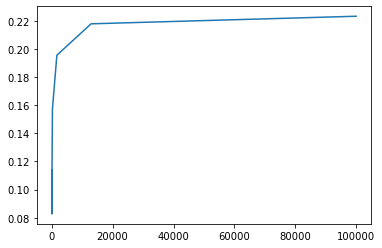

In [9]:
plt.plot(lambdas, scores)